A typical digital image is made by stacking Red Blue and Green pixel arrays of intensities ranging from 0 to 255.

<img src="img/RGB.png">

A grayscale image does not contain color but only shades of gray. The pixel intensity in a grayscale image varies from black (0 intensity) to white (255 full intensity) to make it what we usually call as a Black & White image.

Digits dataset is a grayscale image dataset of handwritten digit having 1797 8×8 images.

In [1]:
#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
 
digits = load_digits()
data = digits.data
data.shape

(1797, 64)

In [2]:
data.max()

16.0

In [11]:
data[:, 28]

array([ 0., 16., 15., ..., 16.,  7., 16.])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

<Axes: >

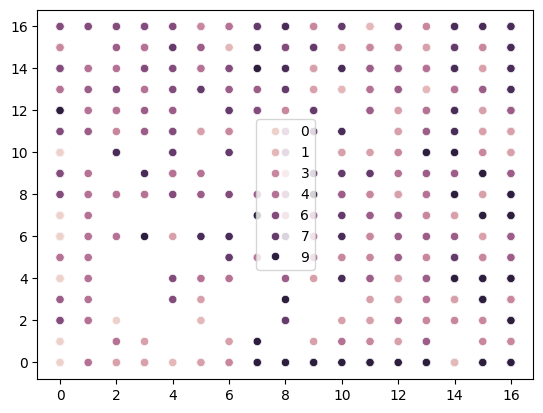

In [12]:
import seaborn as sns

sns.scatterplot(x=data[:, 28], y= data[:, 35], hue=digits.target)

sklearn.datasets module makes it quick to import digits data by importing load_digits class from it. The shape of the digit data is (1797, 64). 8×8 pixels are flattened to create a vector of length 64 for every image.

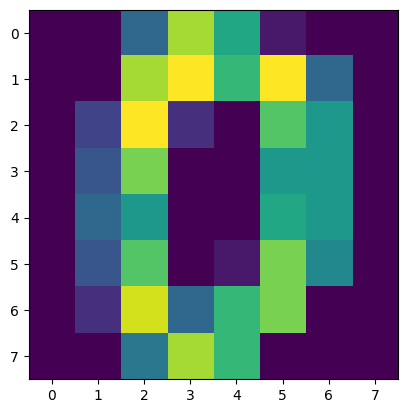

In [13]:
#taking a sample image to view
#Remember image is in the form of numpy array.
image_sample = data[0,:].reshape(8,8)
plt.imshow(image_sample)

Now, using PCA, let’s reduce the image dimensions from 64 to just 2 so that we can visualize the dataset using a Scatterplot.

<Axes: >

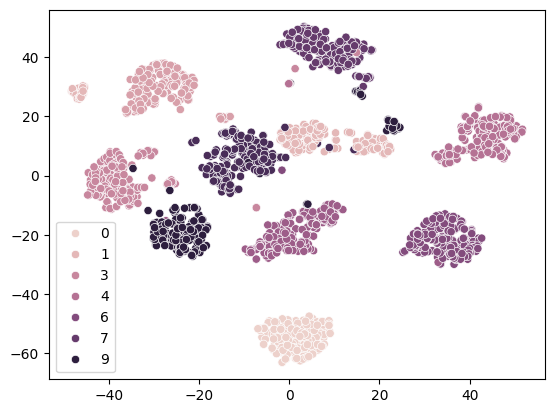

In [26]:
from sklearn.manifold import TSNE


pca = TSNE(2)
converted_data = pca.fit_transform(digits.data)

converted_data.shape

sns.scatterplot(x=converted_data[:,0], y= converted_data[:,1], hue=digits.target)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(2)
converted_data = pca.fit_transform(digits.data)

converted_data.shape

(1797, 2)

<Axes: >

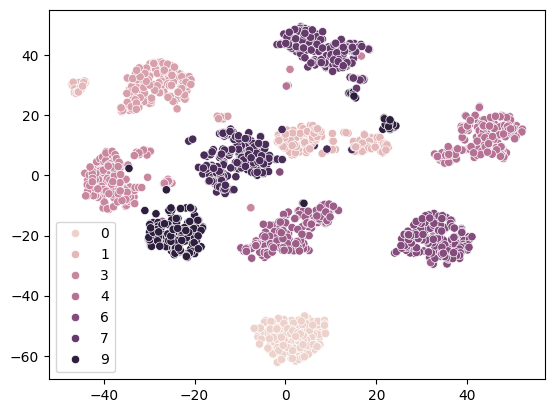

In [23]:
sns.scatterplot(x=converted_data[:,0], y= converted_data[:,1], hue=digits.target)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(64)
converted_data = pca.fit_transform(digits.data)

converted_data.shape

(1797, 64)

In [10]:
sum(pca.explained_variance_ratio_[0:2])

0.28509364823699324

We can also pass a float value less than 1 instead of an integer number. i.e. PCA(0.90) this means the algorithm will find the principal components which explain 90% of the variance in data.

C:\Users\admin\AppData\Local\Temp\ipykernel_10680\2230958132.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\admin\AppData\Local\Temp\ipykernel_10680\2230958132.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


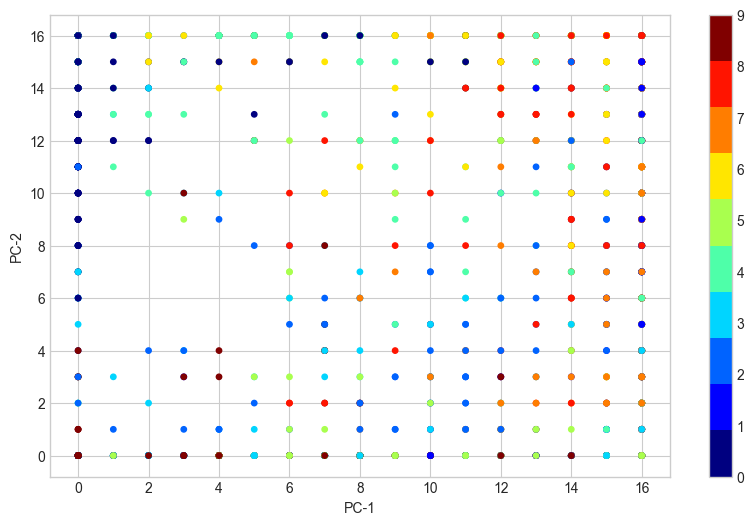

In [14]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize = (10,6))

c_map = plt.cm.get_cmap('jet', 10)

plt.scatter(digits.data[:, 35], digits.data[:, 42], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show();

C:\Users\admin\AppData\Local\Temp\ipykernel_10680\2997529898.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
C:\Users\admin\AppData\Local\Temp\ipykernel_10680\2997529898.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c_map = plt.cm.get_cmap('jet', 10)


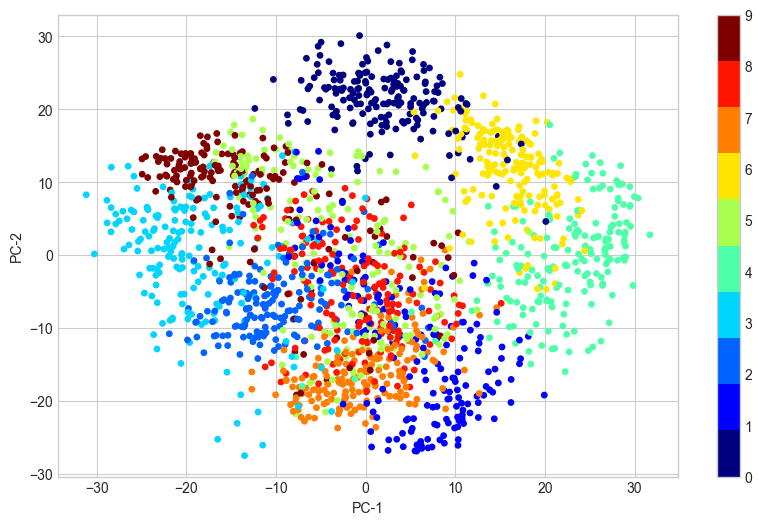

In [20]:
plt.style.use('seaborn-whitegrid')

plt.figure(figsize = (10,6))

c_map = plt.cm.get_cmap('jet', 10)

plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = digits.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show();

Another cool application of PCA is in Image compression. Let’s have a look at how can we achieve this with python.

In [28]:
# !pip install opencv-python

In [29]:
# Importing required libraries
import cv2
import numpy as np
from sklearn.decomposition import PCA

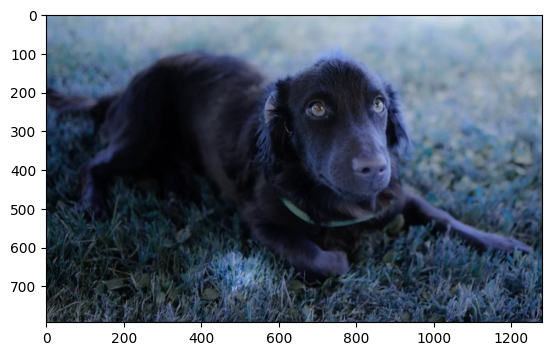

In [30]:
# Loading the image 
img = cv2.imread('img/my_doggo_sample.jpeg')
plt.imshow(img);

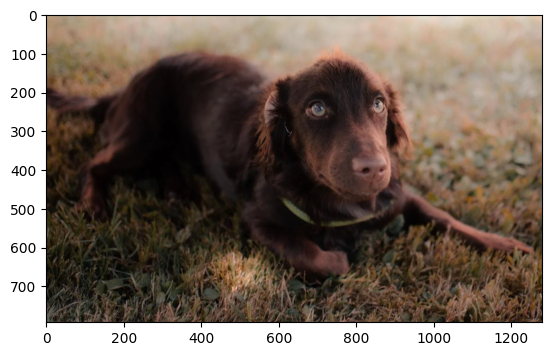

In [31]:
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image);

In [32]:
img.shape

(793, 1280, 3)

In [20]:
img.size

3045120

In [21]:
793*1280

1015040

In [33]:

img

array([[[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [192, 216, 246],
        [193, 217, 248],
        [193, 217, 248]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [191, 215, 245],
        [192, 216, 246],
        [192, 216, 246]],

       [[133, 163, 183],
        [133, 163, 183],
        [133, 163, 183],
        ...,
        [189, 213, 243],
        [190, 214, 244],
        [190, 214, 244]],

       ...,

       [[ 47,  63,  76],
        [ 30,  45,  56],
        [ 47,  63,  69],
        ...,
        [ 26,  51,  77],
        [ 29,  55,  79],
        [ 50,  76, 100]],

       [[ 46,  62,  75],
        [ 18,  35,  46],
        [ 29,  45,  52],
        ...,
        [ 40,  67,  95],
        [ 40,  68,  93],
        [ 48,  77, 100]],

       [[ 32,  48,  61],
        [ 17,  34,  45],
        [ 20,  36,  42],
        ...,
        [ 47,  74, 102],
        [ 43,  73,  98],
        [ 48,  79, 103]]

In [34]:
# Splitting the image in R,G,B arrays.
blue, green, red = cv2.split(img)

#it will split the original image into Blue, Green and Red arrays.

In [31]:
blue.shape

(793, 1280)

In [32]:
793*1280

1015040

In [33]:
plt.imshow??

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    *,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    interpolation_stage=None,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
:doc:`/gallery/images_contours_and_fields/image_antialiasing`).
The resampling can be controlled via the *interpolation* parameter
and/or :rc:`imag

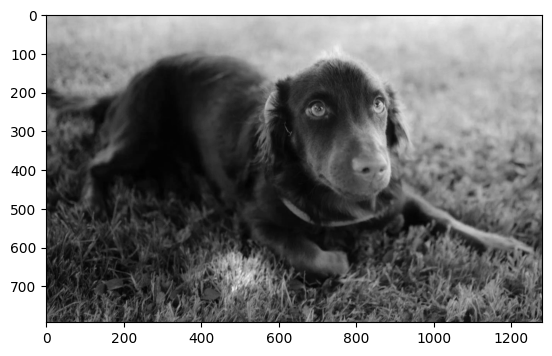

In [35]:
img_not_compressed = cv2.merge([red])
#viewing the not compressed image
plt.imshow(img_not_compressed, cmap="gray");

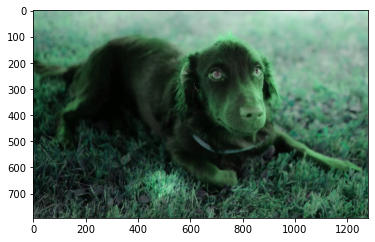

In [28]:
img_not_compressed = cv2.merge([blue, red, green])
#viewing the not compressed image
plt.imshow(img_not_compressed);

OpenCV will split into Blue, Green, and Red channels instead of Red, Blue, and Green. Be very careful of the sequence here.

In [50]:
# Initialize PCA with first 20 principal components
pca = PCA(128)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

red_transformed.shape: (793, 128)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 128)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 128)
blue_inverted.shape: (793, 1280)


In [51]:
1000000/64

15625.0

In the process of reconstructing the original dimensions from the reduced dimensions, some information is lost as we keep only selected principal components, 20 in this case.

In [52]:
img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

Stacking the inverted arrays using dstack function. Here it is important to specify the datatype of our arrays, as most images are of 8 bit. Each pixel is represented by one 8-bit byte.

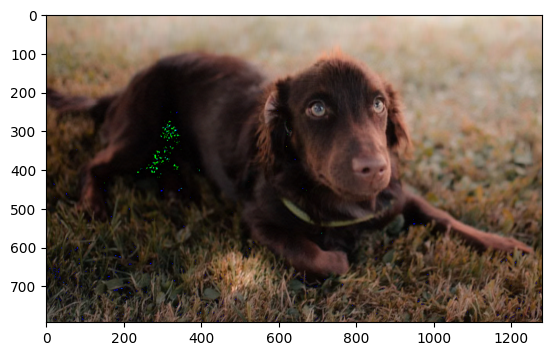

In [53]:
#viewing the compressed image
plt.imshow(img_compressed);

The output above is what we get when considering just 20 Principal components.

If we increase the number of Principal components the output image will get clear.

1) Now check with how many Principal Components your eyes can't see the difference with the original!

2) The dog should not be so blue, fix it!

red_transformed.shape: (793, 8)
red_inverted.shape: (793, 1280)
green_transformed.shape: (793, 8)
green_inverted.shape: (793, 1280)
blue_transformed.shape: (793, 8)
blue_inverted.shape: (793, 1280)


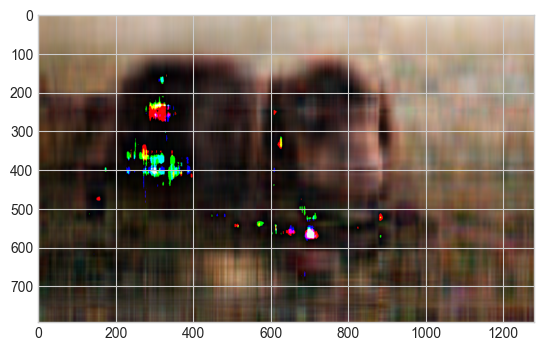

In [50]:
# Initialize PCA with first 20 principal components
pca = PCA(8)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
print('red_transformed.shape:', red_transformed.shape)
red_inverted = pca.inverse_transform(red_transformed)
print('red_inverted.shape:', red_inverted.shape)

#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
print('green_transformed.shape:', green_transformed.shape)
green_inverted = pca.inverse_transform(green_transformed)
print('green_inverted.shape:', green_inverted.shape)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
print('blue_transformed.shape:', blue_transformed.shape)
blue_inverted = pca.inverse_transform(blue_transformed)
print('blue_inverted.shape:', blue_inverted.shape)

img_compressed = (cv2.merge([red_inverted, green_inverted, blue_inverted])).astype(np.uint8)

#viewing the compressed image
plt.imshow(img_compressed);

In [41]:
1000000/65

15384.615384615385

In [46]:
# Initialize PCA with first 20 principal components
pca = PCA(793)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)

In [47]:
pca.explained_variance_ratio_

array([6.58880878e-01, 1.39661043e-01, 3.45894481e-02, 2.46848748e-02,
       1.96950683e-02, 1.45884126e-02, 1.02212409e-02, 8.63486016e-03,
       7.82567107e-03, 6.84327199e-03, 5.66442861e-03, 4.74930561e-03,
       4.32679893e-03, 3.84190249e-03, 3.69022855e-03, 3.39940105e-03,
       2.78251034e-03, 2.36068149e-03, 2.34699739e-03, 2.20992857e-03,
       1.96598663e-03, 1.79474749e-03, 1.73537363e-03, 1.58730225e-03,
       1.48193609e-03, 1.47204118e-03, 1.35946117e-03, 1.22532726e-03,
       1.17159704e-03, 1.12227693e-03, 1.04877760e-03, 9.89058958e-04,
       9.01017082e-04, 8.66985736e-04, 8.30039951e-04, 7.76431970e-04,
       7.70091541e-04, 7.25329989e-04, 6.85648761e-04, 6.31861174e-04,
       5.91332857e-04, 5.72432587e-04, 5.43292902e-04, 5.14047533e-04,
       5.00575778e-04, 4.74399365e-04, 4.51786177e-04, 4.49761059e-04,
       4.15358268e-04, 4.00256792e-04, 3.85828166e-04, 3.61864141e-04,
       3.51825479e-04, 3.48459774e-04, 3.37847361e-04, 3.10472757e-04,
      

In [55]:
import pandas as pd


In [57]:
df = pd.read_csv(r"train.csv")

In [59]:
df = df.drop("ID", axis=1)

In [63]:
y = df.y

In [66]:
X = df.iloc[:,1:]

In [67]:
X

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X = X.iloc[:, 8:]

In [71]:
X

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [75]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
rf.score(X_test, y_test)

0.5014509470268433

In [79]:
rf_pca = Pipeline([("pca", PCA(2)), ("rf", RandomForestRegressor())])
rf_pca.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)), ('rf', RandomForestRegressor())])

In [80]:
rf_pca.score(X_test, y_test)

0.22575457481706862

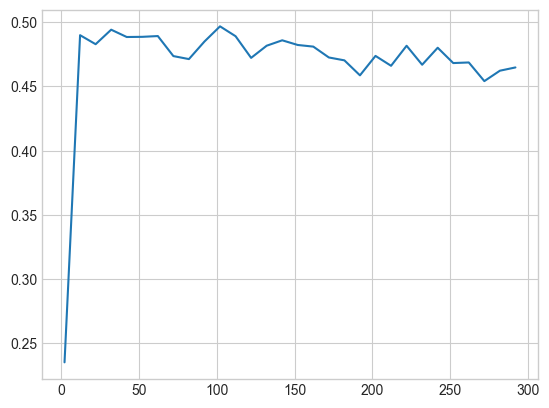

In [84]:
import matplotlib.pyplot as plt

plt.plot(range(2, 300, 10), scores)

In [85]:
scores

[0.23486555152915023,
 0.4899489741253339,
 0.4829146475676027,
 0.49423104520412464,
 0.48852970134203666,
 0.4886621798249642,
 0.4892688504930339,
 0.47365204670864636,
 0.47131218907156325,
 0.48501707079220924,
 0.49684598959266013,
 0.48915191741361963,
 0.47225734400921293,
 0.4817317924900899,
 0.4859544008041342,
 0.48231020383926404,
 0.481037512609085,
 0.4725705567729095,
 0.47032274694279175,
 0.4586386210016984,
 0.47379562057317426,
 0.4660862325038163,
 0.4817036972317996,
 0.46690402842400214,
 0.4801598659918991,
 0.4682115009807929,
 0.4686844079295117,
 0.45413567225856943,
 0.46225310624744664,
 0.46480114956391194]